# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


__Exploratory Data Analysis__

Exploratory data analysis shows that out of the 8351 total dog images, 6680 (approximately 80%) are destined for training, whereas 835 and 836 (approximately 10%), respectively, are reserved for validation and testing, respectively. Furthermore, as can be seen below (when displaying the head of each dataset), the various dataset classes are highly imbalanced, as the different dog breeds display a varying amount of files.

As the data analysis done below shows, the imbalance statement also applies to the human dataset. 

In [2]:
### Data Analysis

# Import the necessary libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

# Write function that counts files in folders from a directory, provided their path is specified

def files_counter(path="."):
    '''
    Determine the number of files inside all the folders from a given directory

    Args:
        path: the path of the directory
    Returns:
        a dictionary containing the number of files in each folder of the directory
     '''
    
    filesINfolder_dict = {}
    total_counter_files = 0
    for dirpath, dirname, filenames in os.walk(path):
        file_count, folder_count = len(filenames), len(dirname)
        total_counter_files += file_count
        filesINfolder_dict[dirpath.split('/')[-1]] = file_count
    print ("The total number of files in " + path + ":", total_counter_files)
    return filesINfolder_dict

# Apply the function for the files/images in the directory "lfw" as well as the folders "train", "valid" and "test", 
# respectively, from the directory "dogImages"

humans = files_counter(path = "./lfw")

dogs_train = files_counter(path = "./dogImages/train")
dogs_valid = files_counter(path = "./dogImages/valid")
dogs_test = files_counter(path = "./dogImages/test")

# Determine the number of files per breed for each of the three datasets in the directory "dogImages"

df_dogs_train = pd.DataFrame.from_dict({'filename': list(dogs_train.keys()), 'filecount': list(dogs_train.values())})
df_dogs_train = df_dogs_train[1:]
print(df_dogs_train.head(20))

df_dogs_valid = pd.DataFrame.from_dict({'filename': list(dogs_valid.keys()), 'filecount': list(dogs_valid.values())})
df_dogs_valid = df_dogs_valid[1:]
print(df_dogs_valid.head(20))

df_dogs_test = pd.DataFrame.from_dict({'filename': list(dogs_test.keys()), 'filecount': list(dogs_test.values())})
df_dogs_test = df_dogs_test[1:]
print(df_dogs_test.head(20))

# Determine the number of files/images per person for all the person files in the directory "lfw"

df_humans = pd.DataFrame.from_dict({'filename': list(humans.keys()), 'filecount': list(humans.values())})
df_humans = df_humans[1:]
print(df_humans.head(20))

The total number of files in ./lfw: 13234
The total number of files in ./dogImages/train: 6680
The total number of files in ./dogImages/valid: 835
The total number of files in ./dogImages/test: 836
                                    filename  filecount
1                    train\001.Affenpinscher         64
2                     train\002.Afghan_hound         58
3                 train\003.Airedale_terrier         52
4                            train\004.Akita         63
5                 train\005.Alaskan_malamute         77
6              train\006.American_eskimo_dog         64
7                train\007.American_foxhound         50
8   train\008.American_staffordshire_terrier         66
9           train\009.American_water_spaniel         34
10          train\010.Anatolian_shepherd_dog         50
11           train\011.Australian_cattle_dog         66
12             train\012.Australian_shepherd         66
13              train\013.Australian_terrier         46
14                

__Descriptive Statistics__

Furthermore, descriptive statistics reveals that the training dataset contains on average 50 files / images per dog breed, with a dog breed being characterized by a minimum of 26 and a maximum of 77 files / images. The validation dataset has an average of 6, a minimum of 4 and a maximum of 9 files / images per dog breed, whereas the dataset used for testing displays on average 6, a minimum of 3 and a maximum of 10 files / images per dog breed.

The human dataset, on the other hand, contains on average just 2 files / images per person, whereas the minimum lies at 1 and the maximum at a whopping 530 files / images per person.

This concludes that the dogs training as well as the human faces datasets present the greatest imbalances.

In [3]:
### Descriptive Statistics

# Dog images

print(df_dogs_train.describe())
print(df_dogs_valid.describe())
print(df_dogs_test.describe())

# Human images

print(df_humans.describe())

        filecount
count  133.000000
mean    50.225564
std     11.863885
min     26.000000
25%     42.000000
50%     50.000000
75%     61.000000
max     77.000000
        filecount
count  133.000000
mean     6.278195
std      1.350384
min      4.000000
25%      6.000000
50%      6.000000
75%      7.000000
max      9.000000
        filecount
count  133.000000
mean     6.285714
std      1.712571
min      3.000000
25%      5.000000
50%      6.000000
75%      8.000000
max     10.000000
         filecount
count  5749.000000
mean      2.301792
std       9.016410
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max     530.000000


__Plots__

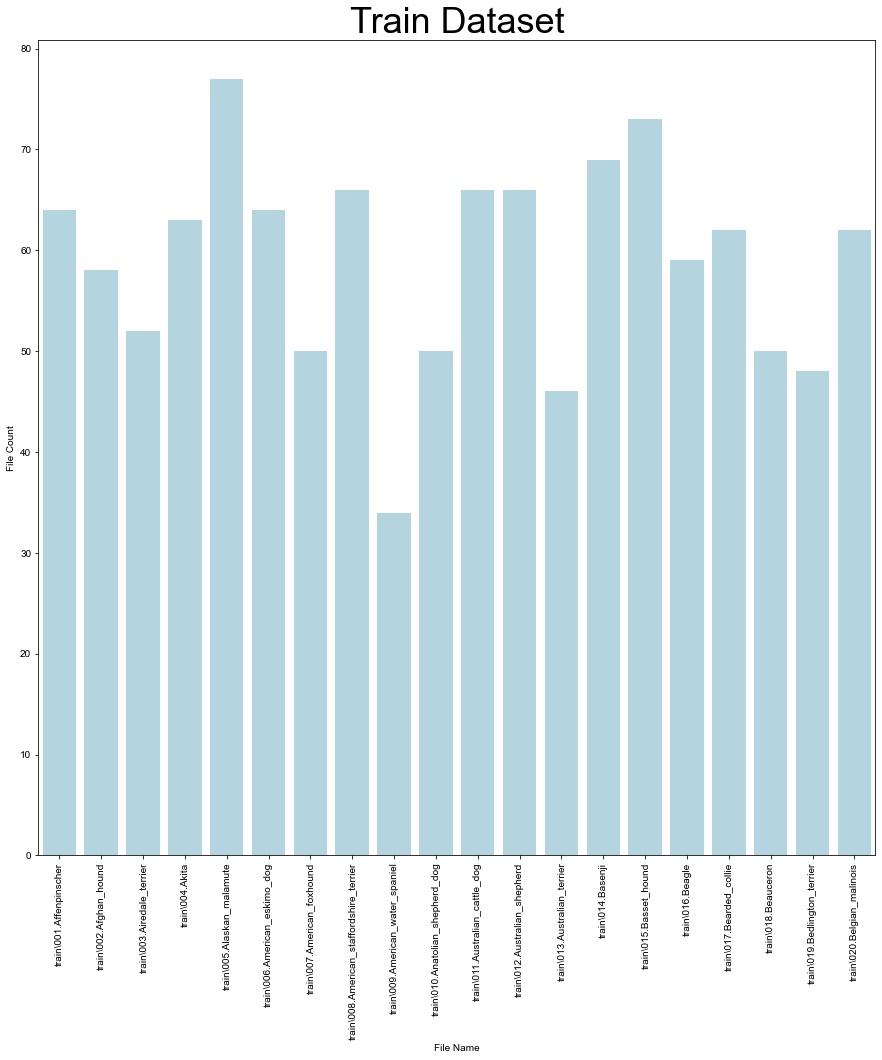

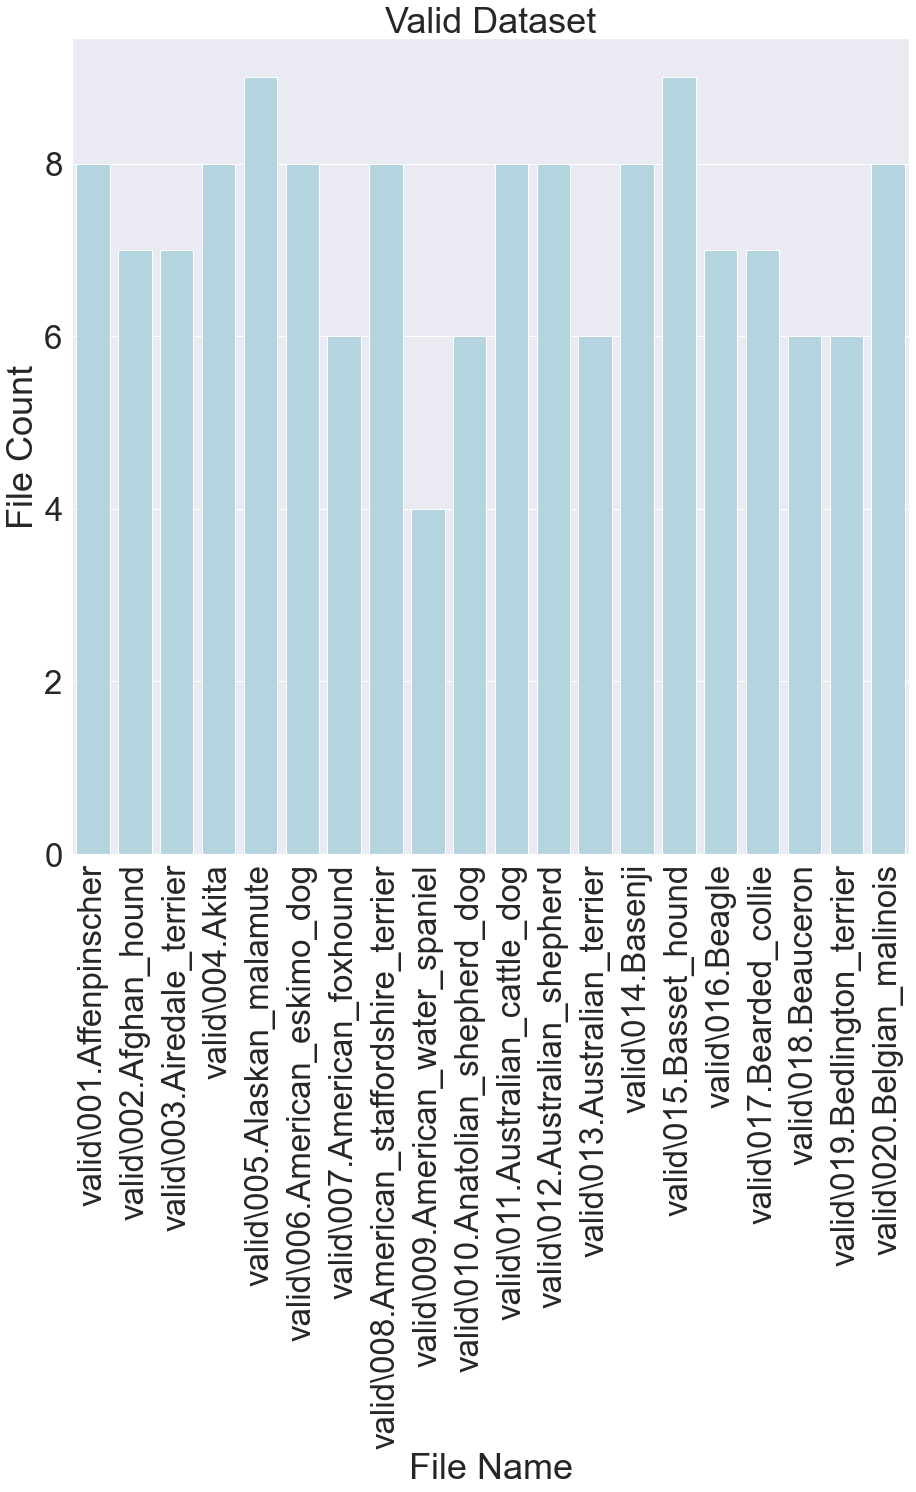

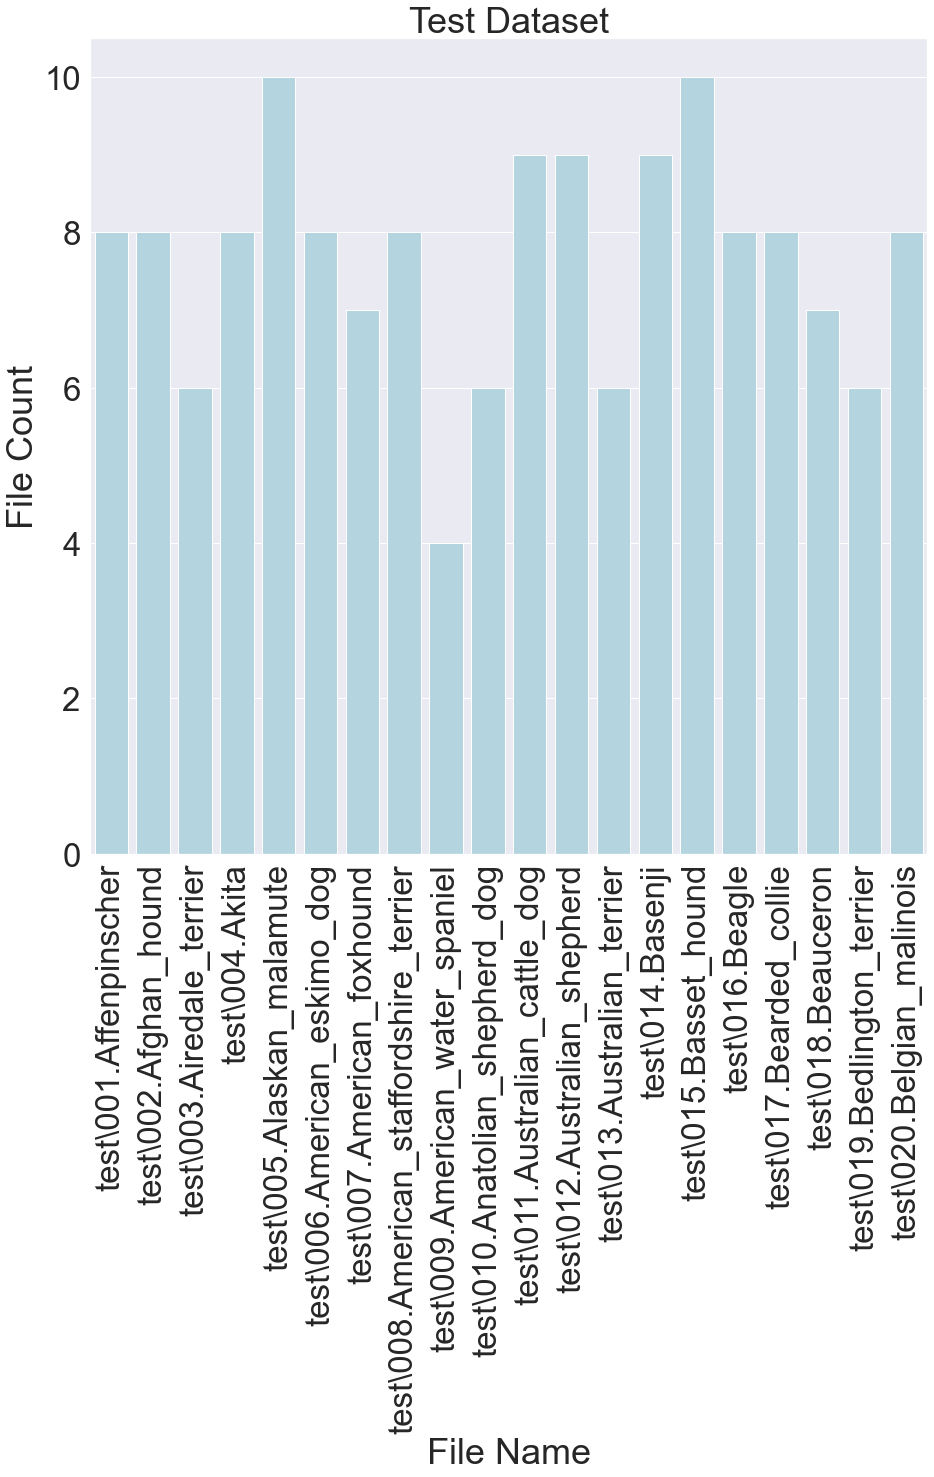

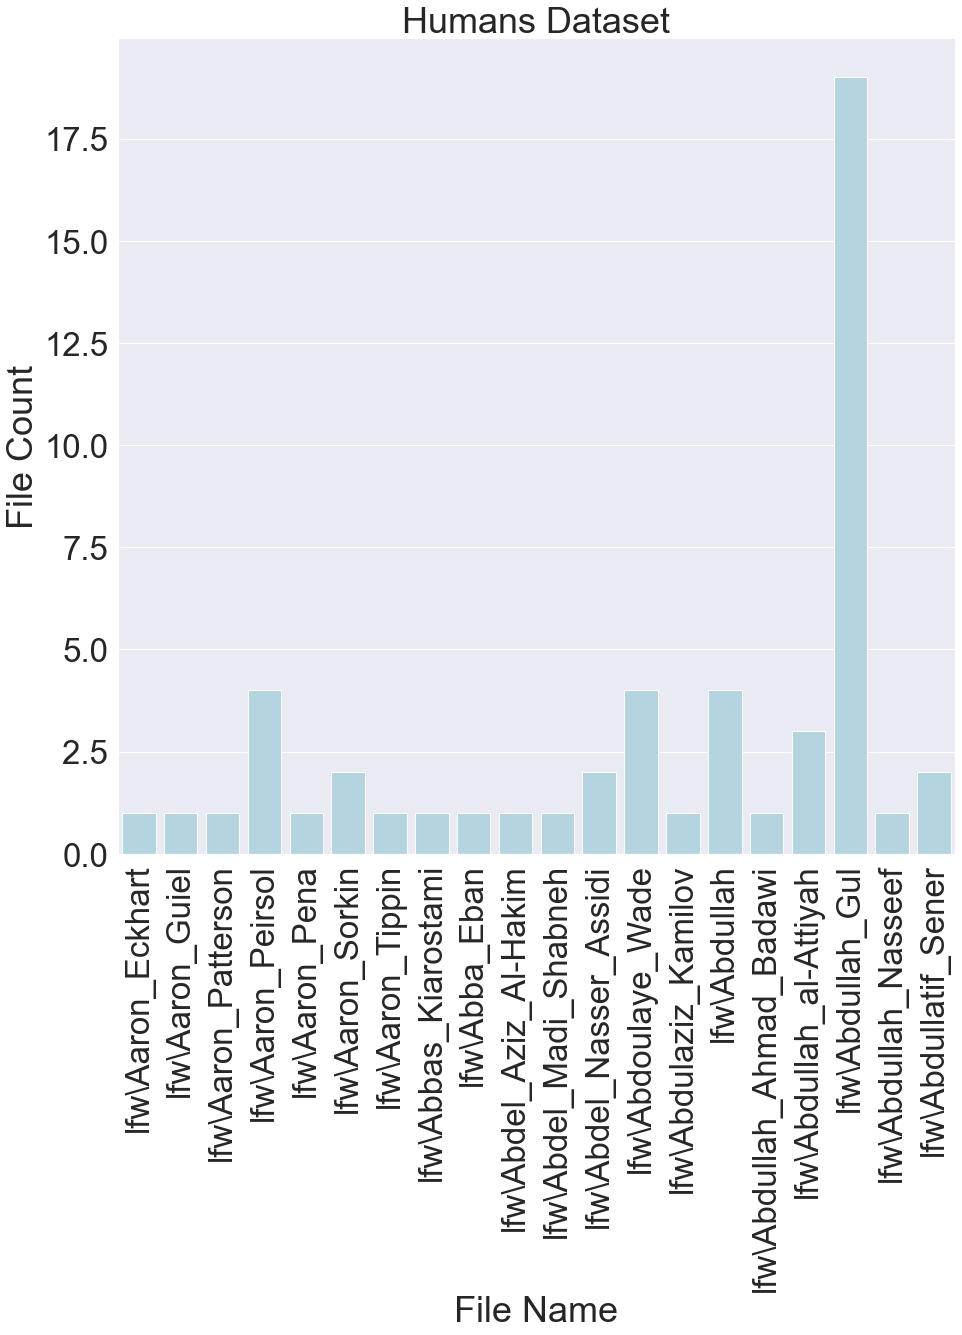

In [4]:
### Plots

plt.figure(figsize=(15,15))
fig = sns.barplot(x="filename", y="filecount", data=df_dogs_train[:20], color = "lightblue")
sns.set(font_scale=3) 
plt.xticks(rotation=90)
plt.xlabel("File Name")
plt.ylabel("File Count")
plt.title("Train Dataset")
plt.savefig("dogs_train.png", bbox_inches='tight')

plt.figure(figsize=(15,15))
fig = sns.barplot(x="filename", y="filecount", data=df_dogs_valid[:20], color = "lightblue")
plt.xticks(rotation=90)
plt.xlabel("File Name")
plt.ylabel("File Count")
plt.title("Valid Dataset")
plt.savefig("dogs_valid.png", bbox_inches='tight')

plt.figure(figsize=(15,15))
fig = sns.barplot(x="filename", y="filecount", data=df_dogs_test[:20], color = "lightblue")
plt.xticks(rotation=90)
plt.xlabel("File Name")
plt.ylabel("File Count")
plt.title("Test Dataset")
plt.savefig("dogs_test.png", bbox_inches='tight')

plt.figure(figsize=(15,15))
fig = sns.barplot(x="filename", y="filecount", data=df_humans[:20], color = "lightblue")
plt.xticks(rotation=90)
plt.xlabel("File Name")
plt.ylabel("File Count")
plt.title("Humans Dataset")
plt.savefig("humans.png", bbox_inches='tight')

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


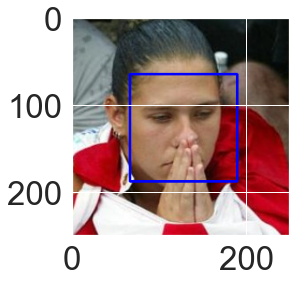

In [5]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[90])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [6]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

* The percentage of detected human faces among the first 100 images in `human_files` is: 96%.
* The percentage of detected human face among the first 100 images in `dog_files` is: 18%.

[see below]

In [7]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

# ANSWER:

count_humans = 0
for h in human_files_short:
    if face_detector(h):
        count_humans += 1
print('Percentage of human faces detected in human_files_short is:', count_humans, '%')
    
count_dogs = 0
for d in dog_files_short:
    if face_detector(d):
        count_dogs += 1
print('Percentage of human faces detected in dog_files_short is:', count_dogs, '%')

Percentage of human faces detected in human_files_short is: 96 %
Percentage of human faces detected in dog_files_short is: 18 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [8]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [9]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # ANSWER:

    # Step 1 - Load the input image
    
    img = Image.open(img_path)
    
    # Step 2 - Define the bundle of transformations done to the input image:
    #   1. Resizing the input image to 224x224 pixels;
    #   2. Converting the input image to the PyTorch Tensor data type;
    #   3. Normalizing the input image with a specific mean and standard deviation.
    
    transform = transforms.Compose([transforms.Resize(224),
                                    transforms.CenterCrop(size=224),
                                    transforms.ToTensor(),                           
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    

    
    # Step 3 - Apply the transformation defined in Step 2 to the input image
    
    img = transform(img)
    
    # Step 4 - Change the Pytorch Tensor into a Tensor of dimension one
    
    img = img.unsqueeze(0)

    # Step 5 - If possible, use CUDA
    # (If CUDA is available, then transform img into CUDA data type
    
    if use_cuda:
        img = img.cuda()
    
    # Step 6 - Obtain a prediction of the model
    
    img_class = VGG16(img)
    
    # Step 7 - Get the maximum value of the Tensor-matrix and return it as an integer
    
    _, max_val = torch.max(img_class, 1)
    prediction = np.squeeze(max_val.numpy()) if not use_cuda else np.squeeze(max_val.cpu().numpy())
       
    # Step 8 - Return the index of the predicted class of the input image
    
    return prediction


# Test function with first image from dog_files_short

print(VGG16_predict(dog_files_short[0]))

252


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [10]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    # ANSWER:
    
    if VGG16_predict(img_path) in range(151, 269):
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

* The percentage of detected dog among the first 100 images in `human_files` is: 0%.
* The percentage of detected dog among the first 100 images in `dog_files` is: 94%.

[see below]

In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

count_dogs_h = 0
for h in human_files_short:
    if dog_detector(h):
        count_dogs_h += 1
print('Percentage of dog images detected in human_files_short is:', count_dogs_h, '%')
    
count_dogs_d = 0
for d in dog_files_short:
    if dog_detector(d):
        count_dogs_d += 1
print('Percentage of dog images detected in dog_files_short is:', count_dogs_d, '%')

Percentage of dog images detected in human_files_short is: 0 %
Percentage of dog images detected in dog_files_short is: 94 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [12]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import ImageFile

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# ANSWER:

# Step 1 - Specifiy appropriate transforms

# 1. Resize the image to 224x224 pixels

resizing = transforms.Resize(224)

# 2. Crop the image at the center to 224x224 pixels

c_cropping = transforms.CenterCrop(224)

# 3. Convert the image to the PyTorch tensor data type

tensoring = transforms.ToTensor()

# 4. Normalize the image with specific mean and standard deviation

normalizing = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


# 5. Define the transforms to be used later on 

train_transform = transforms.Compose([resizing, transforms.RandomResizedCrop(224), transforms.RandomHorizontalFlip(), transforms.RandomRotation(10), tensoring, normalizing])
valid_transform = transforms.Compose([resizing, c_cropping, tensoring, normalizing])
test_transform  = transforms.Compose([resizing, c_cropping, tensoring, normalizing])

# Step 2 - Specifiy appropriate batch sizes

batch_size = 15

# Step 3 - Specifiy the number of subprocesses to use for data loading

num_workers = 0

# Step 4 - Define the data loaders

# 1. Define the paths of the different data sets

data_dir = 'dogImages'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

# 2. Create the image datasets for training, validation and testing data

train_data = datasets.ImageFolder(train_dir, transform=train_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

# 3. Specify the the data loaders for training, validation and testing

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = batch_size, shuffle = True, num_workers = num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers = num_workers)

# Step 5 - Create a dictionary from the 3 data loaders

loaders_scratch = {'train' : train_loader, 'valid' : valid_loader, 'test' : test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

I have chosen a basic pre-processing procedure that is done to all datasets (train, valid and test), but also some additional pre-processing steps only applied to the training dataset.

The standard code does image resizing to 224 x 224 pixels (as this is the default used for the VGG model), center cropping, transformation to tensors, but also, of course, normalization. In addition, for the images in the training set, I also chose to perform data augmentation such as random flips, random resized cropping and random rotation to feed the model more images and to thus avoid overfitting, but also to improve the performance of the model.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [13]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        ## Define layers of a CNN
        
        # ANSWER:
        
        # Define the convolutional layers
     
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)      
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        
        # Define the pooling layer
        
        self.pool = nn.MaxPool2d(2, 2)
        
        # Define the fully-connected layers
        
        self.fc1 = nn.Linear(7*7*128, 512)
        self.fc2 = nn.Linear(512, len(train_data)) 
        
        # Set drop-out parameter
        
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        
        ## Define forward behavior

        # ANSWER:
        
        # The dimensions of a convolutional layer can be determined using the following formula: (W_in−F+2P)/S+1
        # W_in ... Width/height of the previous layer
        # F ... Height (and width if square) of the convolutional filters
        # P ... Padding
        # S ... Stride of the convolution
        
        # Use of the convolutional and pooling layers
        
        # Input ................... Size 224
        x = F.relu(self.conv1(x)) # Size 112
        x = self.pool(x)          # Size 56
        x = F.relu(self.conv2(x)) # Size 28
        x = self.pool(x)          # Size 14
        x = F.relu(self.conv3(x)) # Size 14
        x = self.pool(x)          # Size 7
        
        # Use of the fully-connected layers (flattening) and the drop-out parameter
        
        x = x.view(x.size(0), -1) # or x = x.view(7*7*128,-1), whereby -1 means using information from other dimensions 
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=6680, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

My final CNN architecture from scratch contains 3 convolutional layers, which all include 3x3-dimensional (square) filters, padding equal to 1 and stride equal to 2 for the first 2 layers, whereas for the last convolutional layer stride is set to 1 to impede further reduction of dimensionality. The first convolutional layer uses 32, the second 64 and the latter 128 3x3 dimensional filters.

Intertwined with the 3 convolutional layers are the pooling layers, whereby maximum pooling is being opted for with both kernal size and stride being chosen such (= 2) as to halve the dimension of the output of the previous convolutional layer to thus avoid overfitting caused by too many parameters. Convolutional and poooling layers are used alternatively as follows: convolutional layer 1, max pooling layer 1, convolutional layer 2, max pooling layer 2, convolutional layer 3, max pooling layer 3.

After the convoltional and pooling layers, two fully-connected layers are designed, whereby a drop-out of 25% is added before each such layer to once again prevent overfitting. The last fully-connected layer is set to produce an output of size 133, thus ultimately predicting the different available classes of dog breeds.

Throughout this CNN, the recitfied linear activation function (ReLU) is used in all convolutional and fully connected layers.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [14]:
import torch.optim as optim

### TODO: select loss function

# ANSWER:

criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer

# ANSWER:

optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [15]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # ANSWER:
            
            # Clear the gradient of all optimized variables
            
            optimizer.zero_grad()
            
            # Forward pass
            
            output = model(data)
            
            # Determine the batch loss
            
            loss = criterion(output, target)
            
            # Backward pass
            
            loss.backward()
            
            # Perform parameter update
            
            optimizer.step()
            
            # Update training loss according to suggestion
            
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            ## update the average validation loss
            
            # ANSWER:
            
            # Forward pass
            
            output = model(data)
            
            # Determine the batch loss
            
            loss = criterion(output, target)
            
            # Update validation loss according to suggestion
            
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).    Saving model...'.
                 format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 5.833659 	Validation Loss: 5.247713
Validation loss decreased (inf --> 5.247713).    Saving model...
Epoch: 2 	Training Loss: 5.028579 	Validation Loss: 4.874913
Validation loss decreased (5.247713 --> 4.874913).    Saving model...
Epoch: 3 	Training Loss: 4.826419 	Validation Loss: 4.664804
Validation loss decreased (4.874913 --> 4.664804).    Saving model...
Epoch: 4 	Training Loss: 4.716013 	Validation Loss: 4.504785
Validation loss decreased (4.664804 --> 4.504785).    Saving model...
Epoch: 5 	Training Loss: 4.632139 	Validation Loss: 4.610055
Epoch: 6 	Training Loss: 4.564158 	Validation Loss: 4.523312
Epoch: 7 	Training Loss: 4.498458 	Validation Loss: 4.625978
Epoch: 8 	Training Loss: 4.435862 	Validation Loss: 4.400158
Validation loss decreased (4.504785 --> 4.400158).    Saving model...
Epoch: 9 	Training Loss: 4.360303 	Validation Loss: 4.162724
Validation loss decreased (4.400158 --> 4.162724).    Saving model...
Epoch: 10 	Training Loss: 4.314510 	

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [16]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.599192


Test Accuracy: 15% (130/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [17]:
## TODO: Specify data loaders

# ANSWER:

# Copy the loaders (loaders_scratch) used in the previous step

loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [18]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

# ANSWER:

# Load the pre-trained model ResNet50 from PyTorch

model_transfer = models.resnet50(pretrained=True)

# Freeze the parameters

for param in model_transfer.parameters():
    param.requires_grad = False

# Replace the last fully-connected layer with a Linear layer with 133 out_features

model_transfer.fc = nn.Linear(2048, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

The use of pre-trained models via Transfer Learning represents a huge advantage as they offer a much needed head start. Among all the available models out there, I have opted for ResNet50 from PyTorch, which was pre-trained based on the ImageNet dataset to perform classification not limited to dog breeds only, but extended on a wide range of object.

First, I have loaded the pre-trained ResNet50 model from PyTorch. Second, I have frozen the parameters of the pre-trained model to make use of its already acquired knowledge. Third, I have replaced the last fully-connected layer with a linear layer with only 133 output features corresponding the number of available dog-breeds.

As the CNN model from scratch, the CNN model using Transfer Learning minimizes the cross-entropy loss (or log loss), however, unlike the CNN model from scratch, where I employed the SGD optimizer and a learning rate of 0.05, the model involving Transfer Learning uses the Adam optimizer and a learning rate of 0.01 as this rendered a superior performance during hyperparameter tuning.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [19]:
# ANSWER:

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [20]:
# train the model

# ANSWER:

n_epochs = 20

model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)

# ANSWER:

model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 9.471073 	Validation Loss: 5.646105
Validation loss decreased (inf --> 5.646105).    Saving model...
Epoch: 2 	Training Loss: 8.047280 	Validation Loss: 6.382828
Epoch: 3 	Training Loss: 8.367067 	Validation Loss: 4.547188
Validation loss decreased (5.646105 --> 4.547188).    Saving model...
Epoch: 4 	Training Loss: 8.343046 	Validation Loss: 5.794881
Epoch: 5 	Training Loss: 8.496834 	Validation Loss: 4.877855
Epoch: 6 	Training Loss: 8.467915 	Validation Loss: 5.414887
Epoch: 7 	Training Loss: 8.417062 	Validation Loss: 5.413150
Epoch: 8 	Training Loss: 8.590823 	Validation Loss: 4.649716
Epoch: 9 	Training Loss: 8.559156 	Validation Loss: 4.667998
Epoch: 10 	Training Loss: 8.909119 	Validation Loss: 4.724946
Epoch: 11 	Training Loss: 8.863285 	Validation Loss: 4.886365
Epoch: 12 	Training Loss: 8.527397 	Validation Loss: 4.930809
Epoch: 13 	Training Loss: 9.130736 	Validation Loss: 4.342111
Validation loss decreased (4.547188 --> 4.342111).    Saving model..

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [21]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 4.677873


Test Accuracy: 77% (651/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [26]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]

class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    
    # load the image and return the predicted breed
    
    # ANSWER:
    
    # class names without number (Affenpinscher, Brussels griffon...)
    # class names with number (001.Affenpinscher', '038.Brussels_griffon')
    class_names_without_number = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]
    class_names_with_number = loaders_transfer['train'].dataset.classes
    
    # Load image
    img = Image.open(img_path).convert('RGB')
    
    # Image Preprocessing
    
    transform_predict = transforms.Compose([transforms.Resize(224),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                 std=[0.229, 0.224, 0.225])])
    
    img = transform_predict(img).unsqueeze(0)
    model_transfer.eval()
    index = torch.argmax(model_transfer(img))
    return class_names_without_number[index]
    

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [27]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    
    ## handle cases for a human face, dog, and neither
    
    # ANSWER:

    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    
    if dog_detector(img_path) is True:
        prediction = predict_breed_transfer(img_path)
        print("Hello, dog!\nYour breed is... {0}".format(prediction))  
    elif face_detector(img_path) > 0:
        prediction = predict_breed_transfer(img_path)
        print("Hello, human!\nYou look like a... {0}".format(prediction))
    else:
        print("Hello, unidentified!\nCare to teach me what you are?\nI want to learn. :D")   

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

The output is neither better, nor worse than I expected, but corresponds my expectations. Unfortunately and despite being an animal and in particular a dog lover, I do not have any personal pictures of dogs on my computer, which is why I downloaded several images of dogs that appealed me from the internet.

While I am quite satisfied with my algorithm, I do see some improvement potential:
1. Improving the accuracy of the human face detector.
2. Improving the accuracy of the dog breed classifier.
3. Increasing the number of epochs.
4. Adding more image augmentations to potentially improve model accuracy.
5. Increasing the accessability of the algorithm via a web application.
6. Expanding the training, validation and testing datasets to more than 133 dog breeds.

There are 6 total human images.
There are 6 total dog images.


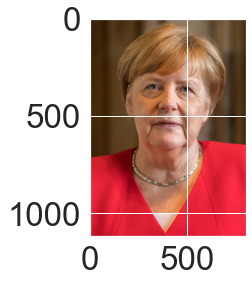

Hello, human!
You look like a... Norfolk terrier


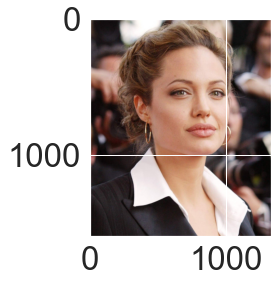

Hello, human!
You look like a... Akita


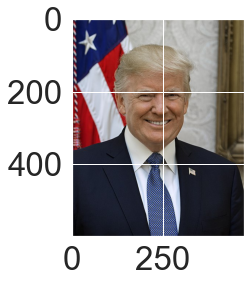

Hello, human!
You look like a... Norfolk terrier


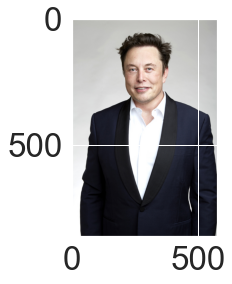

Hello, human!
You look like a... Newfoundland


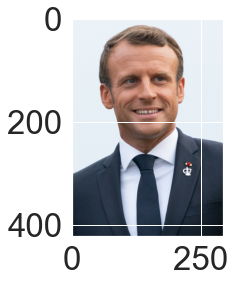

Hello, human!
You look like a... Norfolk terrier


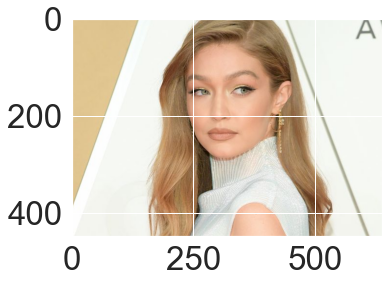

Hello, human!
You look like a... English toy spaniel


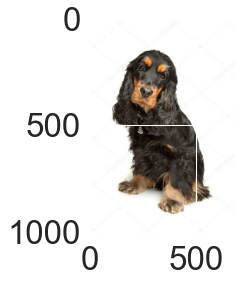

Hello, dog!
Your breed is... Cavalier king charles spaniel


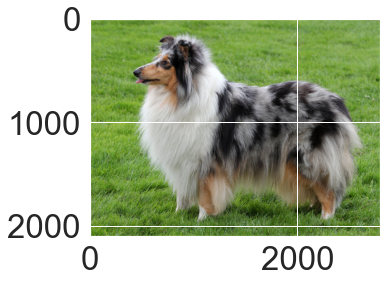

Hello, dog!
Your breed is... Collie


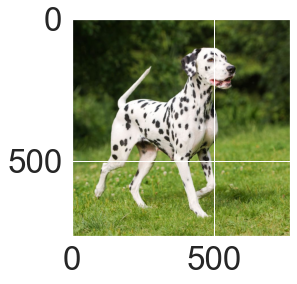

Hello, dog!
Your breed is... Dalmatian


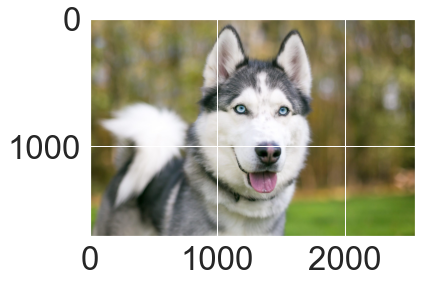

Hello, dog!
Your breed is... Alaskan malamute


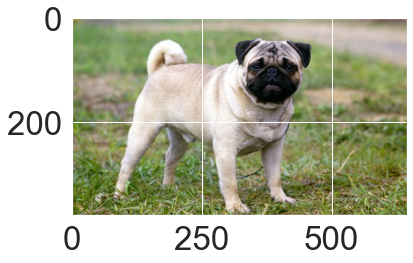

Hello, dog!
Your breed is... Chinese shar-pei


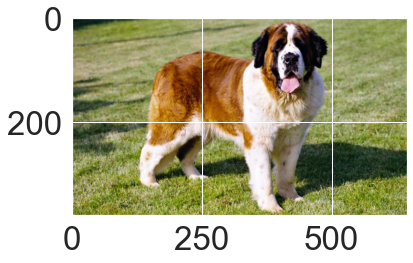

Hello, dog!
Your breed is... Saint bernard


In [28]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

# ANSWER:

# Step 1 - Load custom test images

human_images = np.array(glob("test sample images/humans/*"))
dog_images = np.array(glob("test sample images/dogs/*"))

# Display the nr. of images of the humans and dogs datasets, respectively (optional)

print('There are %d total human images.' % len(human_images))
print('There are %d total dog images.' % len(dog_images))

# Step 2 - Run the algorithm

for file in np.hstack((human_images, dog_images)):
    run_app(file)